<a href="https://colab.research.google.com/github/AshleyBrooks213/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Ashley_Brooks_DS21_Unit2_MOD1_Sprint1__LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv',
                 parse_dates=['created'])
assert df.shape == (49352, 34)

In [ ]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

**1.) Take a Look at the Data**

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   bathrooms             48818 non-null  float64       
 1   bedrooms              48818 non-null  int64         
 2   created               48818 non-null  datetime64[ns]
 3   description           47393 non-null  object        
 4   display_address       48685 non-null  object        
 5   latitude              48818 non-null  float64       
 6   longitude             48818 non-null  float64       
 7   price                 48818 non-null  int64         
 8   street_address        48808 non-null  object        
 9   interest_level        48818 non-null  object        
 10  elevator              48818 non-null  int64         
 11  cats_allowed          48818 non-null  int64         
 12  hardwood_floors       48818 non-null  int64         
 13  dogs_allowed    

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Our Focus is on Price and Latitude**

In [ ]:
import matplotlib.pyplot as plt

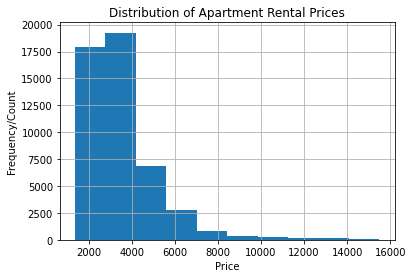

In [ ]:
#Histogram of price
df['price'].hist()
plt.xlabel('Price')
plt.ylabel('Frequency/Count')
plt.title('Distribution of Apartment Rental Prices');

Text(0.5, 1.0, 'Frequency of Apartment Rental Latitudes')

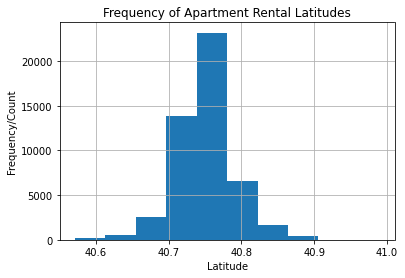

In [ ]:
#Histogram of Latitude
df['latitude'].hist()
plt.xlabel('Latitude')
plt.ylabel('Frequency/Count')
plt.title('Frequency of Apartment Rental Latitudes')

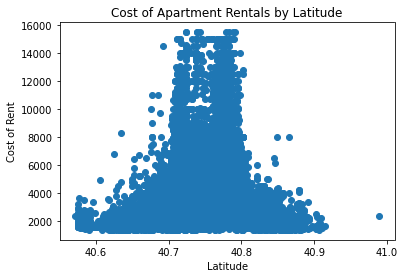

In [ ]:
#Scatter Plot of Price and Latitude
plt.scatter(df['latitude'], df['price'])
plt.xlabel('Latitude')
plt.ylabel('Cost of Rent')
plt.title('Cost of Apartment Rentals by Latitude');

In [ ]:
from statsmodels.formula.api import ols 

model = ols('price~latitude', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     64.10
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           1.21e-15
Time:                        21:07:08   Log-Likelihood:            -4.3412e+05
No. Observations:               48818   AIC:                         8.683e+05
Df Residuals:                   48816   BIC:                         8.683e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.034e+04   8337.619      8.436      0.0

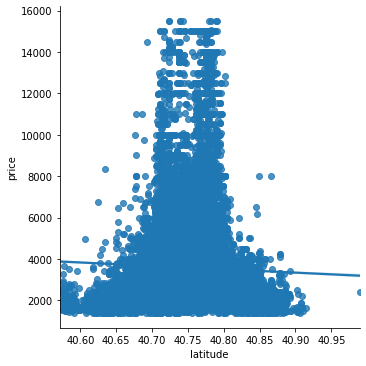

In [ ]:
#Fitting a line in the scatter plot
#there does not appear to be a good linear relationship
import seaborn as sns

ax = sns.lmplot(x='latitude', y='price', data=df)

**Multiple Regression**



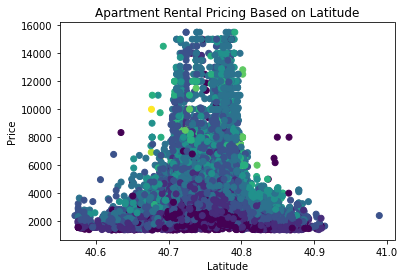

In [ ]:
#Multiple Regression using price, latitude, and bedrooms
fig, ax = plt.subplots()
#Points are colored differently based on number of bedrooms
plt.scatter(x=df['latitude'], y=df['price'], c=df['bedrooms'])
ax.set_title('Apartment Rental Pricing Based on Latitude')
ax.set_xlabel('Latitude')
ax.set_ylabel('Price')

plt.show()

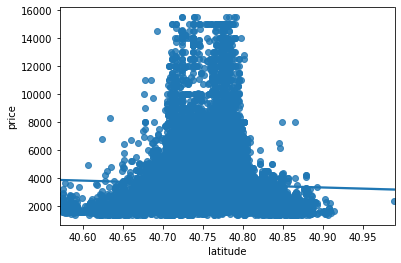

In [ ]:
#Same thing as done above, but done the way that was shown in the Canvas example

# Create Regplot
sns.regplot(x="latitude", y="price", data=df, fit_reg=True)

plt.show()


**Feature Matrix**

In [ ]:
#Create Feature Matrix
X = df[['latitude']]
X.head()

,latitude
0,40.7145
1,40.7947
2,40.7388
3,40.7539
4,40.8241


**Target Vector**

In [ ]:
#Create Target Vector
target = 'price'
y = df[target]

y.head()

0    3000
1    5465
2    2850
3    3275
4    3350
Name: price, dtype: int64

**Establish Baseline**

In [ ]:
y.mean()

3579.5609816051456

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Baseline MAE:', mean_absolute_error(y, [y.mean()]*len(y)))

Baseline MAE: 1201.5251847945751


**BUILD MODEL**

**Import Predictor Class**

In [ ]:
from sklearn.linear_model import LinearRegression

**Instantiate the class(w/default parameters)**

In [ ]:
model=LinearRegression()

In [ ]:
#Display the model parameters
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Fit the Model**

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**PREDICT**

In [ ]:
y_pred = model.predict(X)
y_pred

array([3638.95415883, 3507.57517825, 3599.1473106 , ..., 3564.25488808,
       3651.89547986, 3384.38690719])

**Check Metrics**

In [ ]:
print('Training MAE:', mean_absolute_error(y, y_pred))

Training MAE: 1199.0473456069935


**INTERPRETING MODEL**

In [ ]:
model.coef_

array([-1638.14190247])

In [ ]:
model.intercept_

70335.08264693896

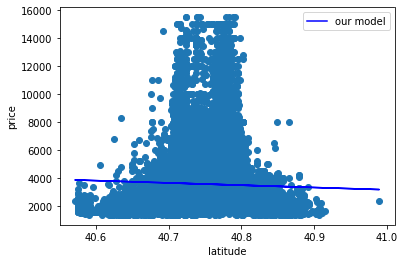

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='blue', label='our model')
plt.legend()
plt.xlabel('latitude')
plt.ylabel('price');